In [2]:
import picnik as pnk
import pandas as pd

files = ['Variable_E/E_var_2.5.csv', 
     'Variable_E/E_var_5.csv', 
     'Variable_E/E_var_10.csv', 
     'Variable_E/E_var_20.csv']


Files to be used: 
['Variable_E/E_var_2.5.csv', 'Variable_E/E_var_5.csv', 'Variable_E/E_var_10.csv', 'Variable_E/E_var_20.csv']
 
Reading files and creating DataFrames...

The computed heating rates are:

2.50 K/min
5.00 K/min
10.00 K/min
20.00 K/min
The temperature range was set to (323.0,1023.0) K
Computing conversion values...
Done


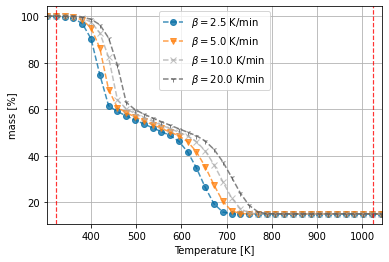

Creating Isoconversion DataFrames...
Done


In [3]:
xtr = pnk.DataExtraction()
#read file (this method has an optional "encoding" parameter)
Beta, T0 = xtr.read_files(files)
#compute files for a given temperature range
xtr.Conversion(323,1023)
#create isoconversional pandas DataFrames
TDF,tDF,dDF,TaDF,taDF = xtr.Isoconversion(advanced=True,
                                          method='points',
                                          N = len(xtr.TempIsoDF))

In [6]:
tDF

,HR 2.5 K/min,HR 5.0 K/min,HR 10.0 K/min,HR 20.0 K/min
0.000000,7.9580,3.9790,1.9895,0.9947
0.000003,7.9827,4.0036,2.0140,1.0190
0.000006,8.0082,4.0290,2.0390,1.0433
0.000009,8.0346,4.0550,2.0644,1.0675
0.000012,8.0619,4.0819,2.0903,1.0918
...,...,...,...,...
1.000000,190.1717,101.1246,53.8619,28.7264
1.000000,190.2180,101.2798,53.9105,28.7506
1.000000,190.4092,101.3187,53.9590,28.7991
1.000000,190.9915,101.5128,54.1046,28.8962


In [ ]:
#instantiate ActivationEnergy object
ace = pnk.ActivationEnergy(Beta, #or xtr.Beta
                           T0, #or xtr.T0
                           TDF, #or xtr.TempIsoDF
                           dDF, #or xtr.diffIsoDF
                           TaDF, #or xtr.TempAdvIsoDF
                           taDF) #or xtr.timeAdvIsoDF
#Compute activation energies with their associated errors
E_Fr = ace.Fr()      #for the Friedman method
E_OFW = ace.OFW()    #for the Ozawa-Flynn-Wall method
E_KAS = ace.KAS()    #for the Kissinger-Akahira-Sunose method
E_Vy = ace.Vy(bounds=(1,300),
              method='senum-yang')      #for the Vyazovkin method
E_aVy = ace.aVy(bounds=(1,300),
                var='tme',
                method='trapezoid')      #for the advanced Vyazovkin method


#export results as xlsx 
ace.export_Ea(E_Fr = True,
              E_OFW = True,
              E_KAS = True,
              E_Vy = True,
              E_aVy = True,
              file_t= "xlsx" )